Name: Wenhao Wu

Student ID: 1304952

In [5]:
import numpy as np

data = np.load("grading.npz")
x = data['x']
y = data['y']

print(x.shape)
print(y.shape)

for i in range(0, x.shape[1]):
    meanScore = np.mean(x[:,i])
    minScore = np.min(x[:,i])
    maxScore = np.max(x[:,i])
    print("score ",i," mean", meanScore)
    print("score ",i," min", minScore)
    print("score ",i," max", maxScore)

meanGrade = np.mean(y)
print("grade mean ",meanGrade)

(4000, 3)
(4000,)
score  0  mean 74.01725
score  0  min 7.0
score  0  max 100.0
score  1  mean 55.40175
score  1  min 0.0
score  1  max 100.0
score  2  mean 61.82125
score  2  min 25.0
score  2  max 98.0
grade mean  3.03275


Observations as below:
1. 4000 students in total
2. Grades are from 0 to 5, Each element of score is 0 to 100
3. Linear equation with three variables, formula could be $ax[0] + bx[1] + cx[2] + d = y$, where x is the array of score and y is the grade of a certain student

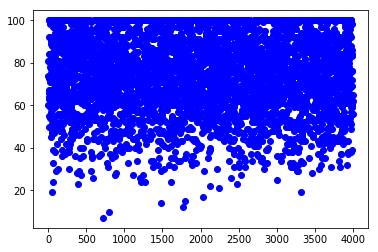

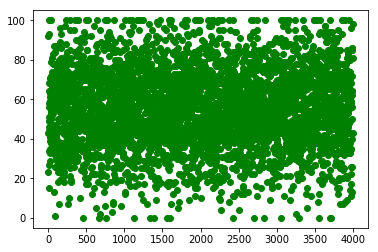

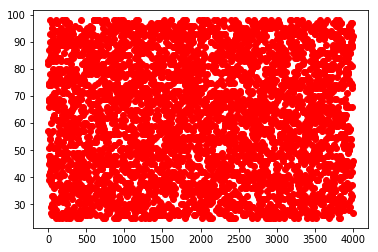

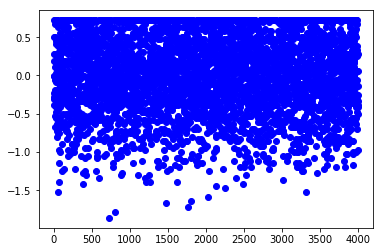

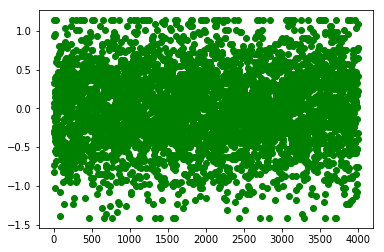

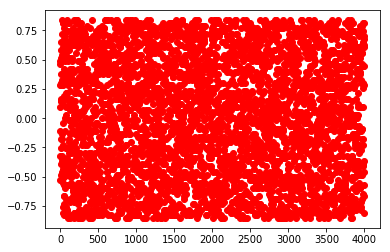

In [6]:
# This cell is to normalize the input, in our case, the scores
import matplotlib.pyplot as plt

axes = plt.gca()
plt.plot(x[:,0],'bo')
plt.show()

plt.plot(x[:, 1], 'go')
plt.show()

plt.plot(x[:,2], 'ro')
plt.show()

mean = np.mean(x, axis=0)
std = np.std(x, axis=0)

x -= mean
x /= (2*std)

axes = plt.gca()
plt.plot(x[:,0],'bo')
plt.show()

plt.plot(x[:,1], 'go')
plt.show()

plt.plot(x[:,2], 'ro')
plt.show()


Observations:
1. This step is to normalize the input.
2. Most of the students gain a good point on the first score.
3. The third score distrubutes most evenly.

In [8]:
import keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape=(3,)))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


Observations:
1. This model has 4 parameter, which matchs the equation $ax[0] + bx[1] + cx[2] + d = y$
2. What is trainable parmas and non-trainable params?

In [15]:
hist = model.fit(x, y, epochs=1, batch_size=1)

p = model.predict(x)
p = p.reshape(1,4000)[0]
p = np.round(p[:])

print("\nAccurancy of batch_size 1 : ",np.sum(p == y) / len(y),"\n")

hist0 = model.fit(x, y, epochs=1, batch_size=100)

p0 = model.predict(x)
p0 = p0.reshape(1,4000)[0]
p0 = np.round(p0[:])

print("\nAccurancy of batch_size 100 : ",np.sum(p0 == y) / len(y), "\n")

hist1 = model.fit(x, y, epochs=1, batch_size=1000)

p1 = model.predict(x)
p1 = p1.reshape(1,4000)[0]
p1 = np.round(p1[:])

print("\nAccurancy of batch_size 1000 : ",np.sum(p1 == y) / len(y))

Epoch 1/1
4000/4000 [==============================] - 4s 1ms/step - loss: 0.2000 - mean_squared_error: 0.2000

Accurancy of batch_size 1 :  0.79875 

Epoch 1/1
4000/4000 [==============================] - 0s 17us/step - loss: 0.1960 - mean_squared_error: 0.1960

Accurancy of batch_size 100 :  0.797 

Epoch 1/1
4000/4000 [==============================] - 0s 2us/step - loss: 0.1959 - mean_squared_error: 0.1959

Accurancy of batch_size 1000 :  0.79725


Explaination:
1. In this step we start to train the model with different value of batch_size
2. After training we use the model to predit input(x)'s corresponding output(p0,p1,p2)
3. Comparing the predit values with the actul output(y) will grand us the accurancy.

Observation:
1. The batch_size does not play an important role in this model.

In [16]:
hist = model.fit(x, y, epochs=1, batch_size=100)

p = model.predict(x)
p = p.reshape(1,4000)[0]
p = np.round(p[:])

print("\nAccurancy of epochs 1 : ",np.sum(p == y) / len(y),"\n")

hist0 = model.fit(x, y, epochs=10, batch_size=100)

p0 = model.predict(x)
p0 = p0.reshape(1,4000)[0]
p0 = np.round(p0[:])

print("\nAccurancy of epochs 10 : ",np.sum(p0 == y) / len(y), "\n")

hist1 = model.fit(x, y, epochs=100, batch_size=100)

p1 = model.predict(x)
p1 = p1.reshape(1,4000)[0]
p1 = np.round(p1[:])

print("\nAccurancy of epochs 100 : ",np.sum(p1 == y) / len(y))

Epoch 1/1
4000/4000 [==============================] - 0s 23us/step - loss: 0.1960 - mean_squared_error: 0.1960

Accurancy of epochs 1 :  0.79625 

Epoch 1/10
4000/4000 [==============================] - 0s 16us/step - loss: 0.1960 - mean_squared_error: 0.1960
Epoch 2/10
4000/4000 [==============================] - 0s 23us/step - loss: 0.1959 - mean_squared_error: 0.1959
Epoch 3/10
4000/4000 [==============================] - 0s 25us/step - loss: 0.1959 - mean_squared_error: 0.1959
Epoch 4/10
4000/4000 [==============================] - 0s 22us/step - loss: 0.1959 - mean_squared_error: 0.1959
Epoch 5/10
4000/4000 [==============================] - 0s 25us/step - loss: 0.1959 - mean_squared_error: 0.1959
Epoch 6/10
4000/4000 [==============================] - 0s 26us/step - loss: 0.1959 - mean_squared_error: 0.1959
Epoch 7/10
4000/4000 [==============================] - 0s 22us/step - loss: 0.1959 - mean_squared_error: 0.1959
Epoch 8/10
4000/4000 [==============================] - 0s 24

Observations:
1. The epochs number does not play an important role in model training either, why?